In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the paths to your image and csv folders
train_val_test= "/content/drive/MyDrive/ML/train_val"   
test = "/content/drive/MyDrive/ML/test"
train_path_csv = "/content/drive/MyDrive/ML/train_val.csv"
train_val_csv = pd.read_csv(train_path_csv)

In [ ]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_test):
  if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(train_val_test, filename))
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = Image.open(os.path.join(train_val, filename))
    img_array = np.array(img)
    # Append the array to the list of images
    images.append(img_array)
    labels.append(filename)
    

In [ ]:
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_train.shape

(1000, 128, 128, 3)

In [ ]:
x_train[:5]
y_train[:5]

array([135, 113, 223,  90,  79])

In [ ]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test):
  if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(test, filename))
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = Image.open(os.path.join(test, filename))
    img_array = np.array(img)
    # Append the array to the list of images
    images.append(img_array)
    labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
x_test.shape

(50, 128, 128, 3)

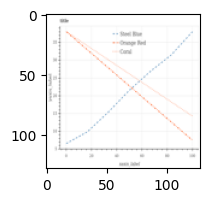

In [ ]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [ ]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_csv['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [ ]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
  plt.figure(figsize = (10,2))
  plt.imshow(x[index])
  # image_label = train_val_csv.iloc[index]['type']
  # plt.xlabel(image_label)
  plt.xlabel(image_classes[y[index]])

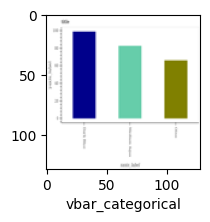

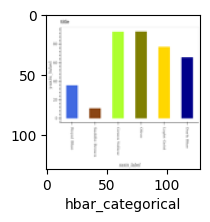

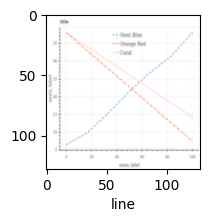

In [ ]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [ ]:
# now we have mapped the corresponding labels to the image
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [ ]:
x_test.shape

(1000, 128, 128, 3)

In [ ]:
# take the label for train data from csv file
y_train_index = train_val_csv['image_index']
y_train_type = train_val_csv['type']

In [ ]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [ ]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
Flatten(input_shape=(128,128,3)),
Dense(3000, activation='relu'),
Dense(1000, activation='relu'),
Dense(5, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 40s 1s/step - loss: 7.2434 - accuracy: 0.2140
Epoch 2/10
32/32 [==============================] - 41s 1s/step - loss: 1.6323 - accuracy: 0.2000
Epoch 3/10
32/32 [==============================] - 34s 1s/step - loss: 1.6143 - accuracy: 0.2070
Epoch 4/10
32/32 [==============================] - 34s 1s/step - loss: 1.6160 - accuracy: 0.1990
Epoch 5/10
32/32 [==============================] - 34s 1s/step - loss: 1.6128 - accuracy: 0.2190
Epoch 6/10
32/32 [==============================] - 34s 1s/step - loss: 1.6077 - accuracy: 0.2250
Epoch 7/10
32/32 [==============================] - 32s 996ms/step - loss: 1.6110 - accuracy: 0.1990
Epoch 8/10
32/32 [==============================] - 44s 1s/step - loss: 1.6058 - accuracy: 0.2170
Epoch 9/10
32/32 [==============================] - 34s 1s/step - loss: 1.6062 - accuracy: 0.2200
Epoch 10/10
32/32 [==============================] - 32s 1s/step - loss: 1.6073 - accuracy: 0.2250


In [ ]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 302ms/step - loss: 1.5928 - accuracy: 0.2250


[1.592767357826233, 0.22499999403953552]

In [ ]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 4s 506ms/step


In [ ]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


In [ ]:
# modify the model architecture to cmnn
cnn_model = Sequential([
Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(32, (3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, (3,3), activation='relu'),MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'),
Dense(5, activation='softmax')
])

Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 1.6450 - accuracy: 0.2163 - val_loss: 3.3858 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 18s 18s/step - loss: 3.1944 - accuracy: 0.2087 - val_loss: 1.9569 - val_accuracy: 0.1900
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.8919 - accuracy: 0.2025 - val_loss: 1.6500 - val_accuracy: 0.1900
Epoch 4/50
1/1 [==============================] - 19s 19s/step - loss: 1.6396 - accuracy: 0.2025 - val_loss: 1.6095 - val_accuracy: 0.1900
Epoch 5/50
1/1 [==============================] - 16s 16s/step - loss: 1.6063 - accuracy: 0.2050 - val_loss: 1.6001 - val_accuracy: 0.1850
Epoch 6/50
1/1 [==============================] - 16s 16s/step - loss: 1.5967 - accuracy: 0.2075 - val_loss: 1.5963 - val_accuracy: 0.1850
Epoch 7/50
1/1 [==============================] - 16s 16s/step - loss: 1.5910 - accuracy: 0.2100 - val_loss: 1.5894 - val_accuracy: 0.2700
Epoch 8/50
1/1 [===========

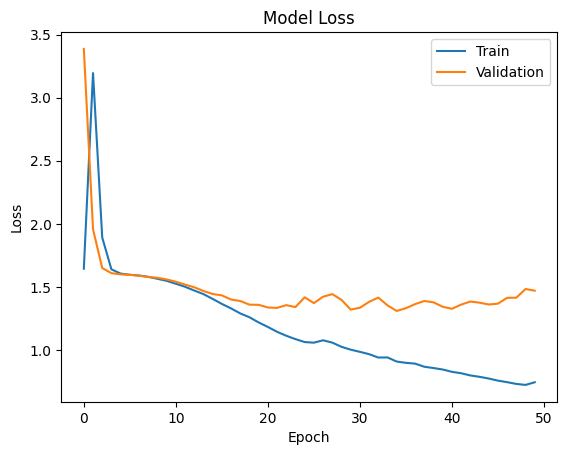

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 117ms/step - loss: 1.4708 - accuracy: 0.4100


[1.4708105325698853, 0.4099999964237213]

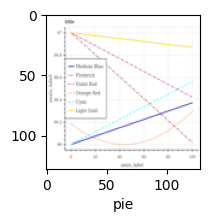

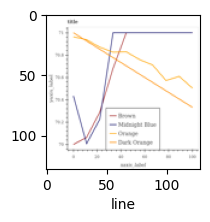

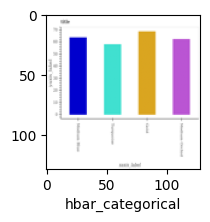

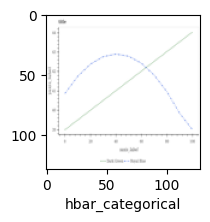

In [ ]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [ ]:
# Observation: we can see some wrong predictions
y_pred = cnn_model.predict(x_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]


7/7 [==============================] - 1s 117ms/step


array([0, 4, 4, 4, 0])

'pie'

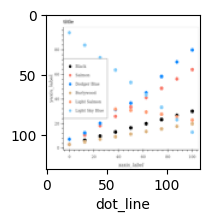

In [ ]:
# here we see some values are not matching
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [ ]:
# some values are not matching
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.28      0.70      0.40        37
           1       0.75      0.20      0.32        44
           2       0.45      0.35      0.40        48
           3       0.59      0.52      0.55        33
           4       0.46      0.34      0.39        38

    accuracy                           0.41       200
   macro avg       0.51      0.42      0.41       200
weighted avg       0.51      0.41      0.40       200



In [ ]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)


Confusion Matrix:
[[26  0  2  1  8]
 [24  9  3  1  7]
 [21  0 17 10  0]
 [ 1  0 15 17  0]
 [21  3  1  0 13]]


Text(95.72222222222221, 0.5, 'Actual')

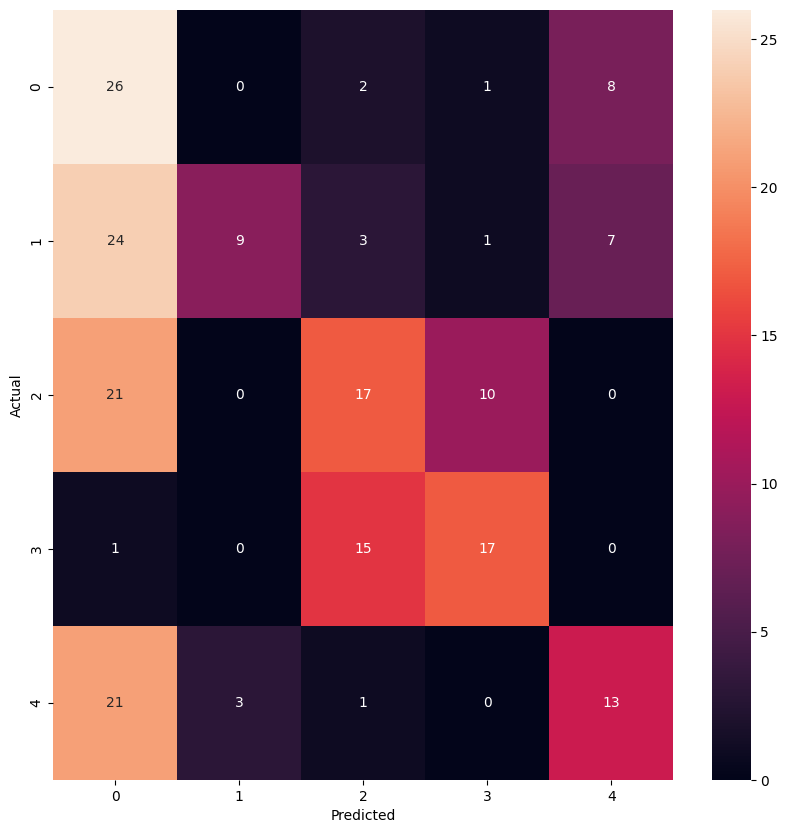

In [ ]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
  layer.trainable = False

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

In [ ]:
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

In [ ]:
!jupyter nbconvert --to html /content/Cnn_assignment_arghya.ipynb

[NbConvertApp] WARNING | pattern '/content/Cnn_assignment_arghya.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=